In [1]:
import numpy as np
import os
from pathlib import Path
from os.path import join

import scipy.stats
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve
import functools

from plot import generate_ours, load_data, do_plot
from mia import do_plot_CV, plot_cv, get_class_idxs

os_root = "/home/ayrton"
x = np.load("exp/cifar10/base/x_train.npy")
y = np.load("exp/cifar10/base/y_train.npy")

clean_dset = {"data":x, "target":y}


def fig_fpr_tpr(keep_list, score_list, fig_labels, outdir, \
                filename=None, xlim=(1e-3, 1), ylim=(1e-2, 1)):

    plt.figure(figsize=(6, 4))
    
    for i in range(len(keep_list)):
        do_plot(functools.partial(generate_ours, fix_variance=True),
                keep_list[i], score_list[i], 1,
                fig_labels[i] + "\n",
                metric='auc'
        )
    
    plt.semilogx()
    plt.semilogy()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot([0, 1], [0, 1], ls='--', color='gray')
    plt.subplots_adjust(bottom=.18, left=.18, top=.96, right=.96)
    plt.legend(loc='lower right', fontsize=8)
    if filename is not None:
        plt.savefig(join(outdir, filename))
    plt.show()
    
def map_idx(targ_idxs, removed_idxs):
    '''
    Maps original indices to experiment indices.
    The new index is simply the original index subtracted by
    by the number of removed_idxs less than it.
    '''
    new_idxs = []
    for t in targ_idxs:
        to_sub = len(removed_idxs[np.where(removed_idxs < t)])
        new_i = t - to_sub
        new_idxs.append(new_i)
    return np.array(new_idxs)

## Targeted

In [2]:
orig_target_idxs = np.load(join(os_root, "removal/targeted/rand_idx.npy"))
# Baseline
baseline = "exp/cifar10"
paths = [exp.path for exp in sorted(os.scandir(baseline), key=lambda e: e.name) \
               if exp.is_dir()]


control_main_scores, control_main_keeps = load_data('exp/cifar10/base')

control_scores = np.take(control_main_scores, orig_target_idxs, axis=1)
control_keeps = np.take(control_main_keeps, orig_target_idxs, axis=1)

# Targeted (Adding Points)
add_main_scores, add_main_keeps = load_data('exp/targeted/base')

add_scores = np.take(add_main_scores, orig_target_idxs, axis=1)
add_keeps = np.take(add_main_keeps, orig_target_idxs, axis=1)

In [6]:
pois = np.load(join(os_root, "removal/targeted/poison.npy"))
target_idxs = map_idx(orig_target_idxs, pois)

Attack Baseline
   AUC 0.6902, Accuracy 0.6191, TPR@0.1%FPR of 0.0517
Attack Addition (r=1)
   AUC 0.9471, Accuracy 0.8778, TPR@0.1%FPR of 0.1568
Attack Removal
   AUC 0.7096, Accuracy 0.6379, TPR@0.1%FPR of 0.0405


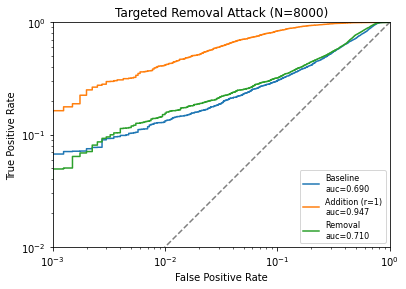

In [7]:
# Removal Poisoning
targ_main_scores, targ_main_keeps = load_data('exp/removal/targeted/base')
targ_scores = np.take(targ_main_scores, target_idxs, axis=1)
targ_keeps = np.take(targ_main_keeps, target_idxs, axis=1)

scores = [control_scores, add_scores, targ_scores]
keeps = [control_keeps, add_keeps, targ_keeps]

exp_names = ["Baseline", "Addition (r=1)", "Removal"]
plot_cv([ [keeps[i], scores[i]] for i in range(len(scores) ) ], \
        exp_names, "Targeted Removal Attack")

### By Influence

Attack Baseline
   AUC 0.6902, Accuracy 0.6191, TPR@0.1%FPR of 0.0517
Attack Addition (r=1)
   AUC 0.9471, Accuracy 0.8778, TPR@0.1%FPR of 0.1568
Attack Removal
   AUC 0.7078, Accuracy 0.6338, TPR@0.1%FPR of 0.0745


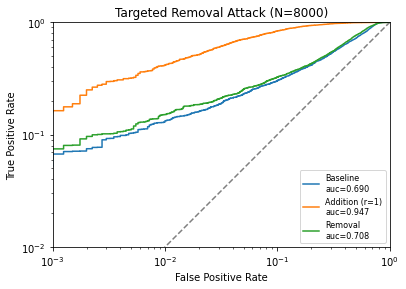

In [8]:
# Removal Poisoning
orig_target_idxs = np.load(join(os_root, "removal/targeted/rand_idx.npy"))
pois = np.load(join(os_root, "removal/targeted/inf/poison.npy"))
target_idxs = map_idx(orig_target_idxs, pois)

targ_main_scores, targ_main_keeps = load_data('exp/removal/targeted/inf')
targ_scores = np.take(targ_main_scores, target_idxs, axis=1)
targ_keeps = np.take(targ_main_keeps, target_idxs, axis=1)

scores = [control_scores, add_scores, targ_scores]
keeps = [control_keeps, add_keeps, targ_keeps]

exp_names = ["Baseline", "Addition (r=1)", "Removal"]
plot_cv([ [keeps[i], scores[i]] for i in range(len(scores) ) ], \
        exp_names, "Targeted Removal Attack")

### Class

In [3]:
orig_target_idxs = np.load(join(os_root, "removal/targeted/class/target_idxs.npy"))
control_scores = np.take(control_main_scores, orig_target_idxs, axis=1)
control_keeps = np.take(control_main_keeps, orig_target_idxs, axis=1)

# Targeted (Adding Points)
add_scores = np.take(add_main_scores, orig_target_idxs, axis=1)
add_keeps = np.take(add_main_keeps, orig_target_idxs, axis=1)

Attack Baseline
   AUC 0.6520, Accuracy 0.6050, TPR@0.1%FPR of 0.0000
Attack Addition (r=1)
   AUC 0.8137, Accuracy 0.7150, TPR@0.1%FPR of 0.1550
Attack Removal (r=10)
   AUC 0.8505, Accuracy 0.7600, TPR@0.1%FPR of 0.2600


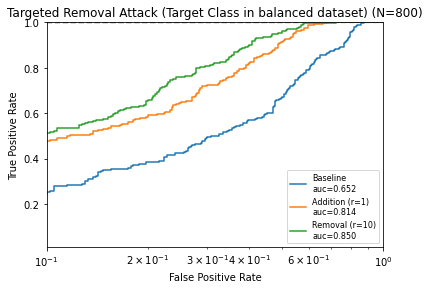

In [4]:
# Removal Poisoning
pois = np.load(join(os_root, "removal/targeted/class/poison.npy"))
target_idxs = map_idx(orig_target_idxs, pois)

targ_main_scores, targ_main_keeps = load_data('exp/removal/targeted/class/balanced')
targ_scores = np.take(targ_main_scores, target_idxs, axis=1)
targ_keeps = np.take(targ_main_keeps, target_idxs, axis=1)

scores = [control_scores, add_scores, targ_scores]
keeps = [control_keeps, add_keeps, targ_keeps]

exp_names = ["Baseline", "Addition (r=1)", "Removal (r=10)"]
plot_cv([ [keeps[i], scores[i]] for i in range(len(scores) ) ], \
        exp_names, "Targeted Removal Attack (Target Class in balanced dataset)", xlim=(1e-1, 1))

Attack Baseline
   AUC 0.6520, Accuracy 0.6050, TPR@0.1%FPR of 0.0000
Attack Addition (r=1)
   AUC 0.8137, Accuracy 0.7150, TPR@0.1%FPR of 0.1550
Attack Removal (r=10)
   AUC 0.8505, Accuracy 0.7600, TPR@0.1%FPR of 0.2600


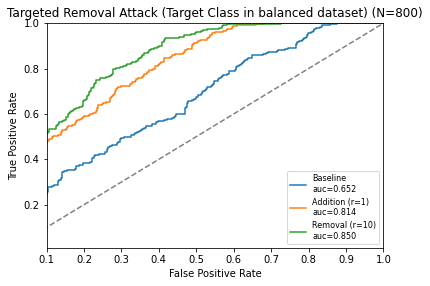

In [5]:
plot_cv([ [keeps[i], scores[i]] for i in range(len(scores) ) ], \
        exp_names, "Targeted Removal Attack (Target Class in balanced dataset)", logx=False, xlim=(1e-1, 1))

### Class as Target with Imbalanced Dataset.

1. Class is Majority (30% more points than other classes each)
2. Class is Majority (30% less points than other classes each)

### Majority

In [2]:
exp_root = "exp/removal/targeted/class/maj"
maj_dset_y = np.load(join(exp_root, "base/y_train.npy"))

target_class = 2
# Already mapped to reduced base dataset
orig_target_idxs = np.load(join(os_root, "removal/targeted/class/maj/target_idxs.npy"))
assert np.isin(orig_target_idxs, get_class_idxs(2, maj_dset_y)).all()


control_main_scores, controlmain_keeps = load_data(join(exp_root, "base"))
control_scores = np.take(control_main_scores, orig_target_idxs, axis=1)
control_keeps = np.take(controlmain_keeps, orig_target_idxs, axis=1)

Attack Baseline
   AUC 0.8334, Accuracy 0.7338, TPR@0.1%FPR of 0.2050
Attack Removal (r=10)
   AUC 0.7662, Accuracy 0.6913, TPR@0.1%FPR of 0.0750
Attack Removal (r=20)
   AUC 0.7471, Accuracy 0.6687, TPR@0.1%FPR of 0.2050
Attack Removal (r=30)
   AUC 0.6905, Accuracy 0.6413, TPR@0.1%FPR of 0.0175


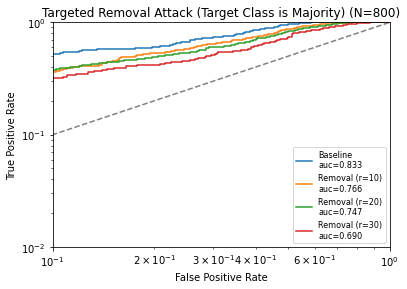

In [3]:
# Removal Poisoning

scores = [control_scores]
keeps = [control_keeps]
exp_names = ["Baseline"]

for i in range(10, 40, 10):
    pois = np.load(join(exp_root, "attack_%i/poison.npy" %i))
    target_idxs = map_idx(orig_target_idxs, pois)

    targ_main_scores, targ_main_keeps = load_data(join(exp_root, "attack_%i" %i))
    targ_scores = np.take(targ_main_scores, target_idxs, axis=1)
    targ_keeps = np.take(targ_main_keeps, target_idxs, axis=1)

    scores.append(targ_scores)
    keeps.append(targ_keeps)
    exp_names.append("Removal (r=%i)" %i)
                                                  
plot_cv([ [keeps[i], scores[i]] for i in range(len(scores) ) ], \
        exp_names, "Targeted Removal Attack (Target Class is Majority)", xlim=(1e-1, 1))

### Minority

In [10]:
exp_root = "exp/removal/targeted/class/min"
min_dset_y = np.load(join(exp_root, "base/y_train.npy"))

target_class = 2
# Already mapped to reduced base dataset
orig_target_idxs = np.load(join(os_root, "removal/targeted/class/min/target_idxs.npy"))
assert np.isin(orig_target_idxs, get_class_idxs(2, min_dset_y)).all()


control_main_scores, controlmain_keeps = load_data(join(exp_root, "base"))
control_scores = np.take(control_main_scores, orig_target_idxs, axis=1)
control_keeps = np.take(controlmain_keeps, orig_target_idxs, axis=1)

Attack Baseline
   AUC 0.7962, Accuracy 0.7050, TPR@0.1%FPR of 0.1350
Attack Removal (r=10)
   AUC 0.7425, Accuracy 0.6787, TPR@0.1%FPR of 0.1275
Attack Removal (r=20)
   AUC 0.6359, Accuracy 0.6075, TPR@0.1%FPR of 0.0225
Attack Removal (r=30)
   AUC 0.6752, Accuracy 0.6350, TPR@0.1%FPR of 0.0400


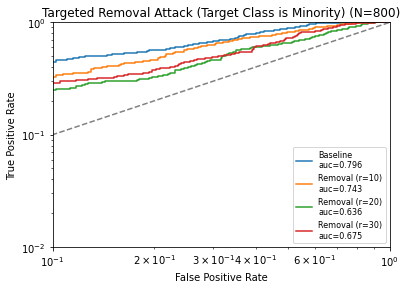

In [11]:
# Removal Poisoning

scores = [control_scores]
keeps = [control_keeps]
exp_names = ["Baseline"]

for i in range(10, 40, 10):
    pois = np.load(join(exp_root, "attack_%i/poison.npy" %i))
    target_idxs = map_idx(orig_target_idxs, pois)

    targ_main_scores, targ_main_keeps = load_data(join(exp_root, "attack_%i" %i))
    targ_scores = np.take(targ_main_scores, target_idxs, axis=1)
    targ_keeps = np.take(targ_main_keeps, target_idxs, axis=1)

    scores.append(targ_scores)
    keeps.append(targ_keeps)
    exp_names.append("Removal (r=%i)" %i)
                                                  
plot_cv([ [keeps[i], scores[i]] for i in range(len(scores) ) ], \
        exp_names, "Targeted Removal Attack (Target Class is Minority)", xlim=(1e-1, 1))

## Extreme (Top/ bottom SCR points)

Attack Baseline
   AUC 0.7510, Accuracy 0.6875, TPR@0.1%FPR of 0.0400
Attack Addition (r=1)
   AUC 0.4980, Accuracy 0.5250, TPR@0.1%FPR of 0.0050
Attack Removal (r=10)
   AUC 0.5839, Accuracy 0.5625, TPR@0.1%FPR of 0.0125


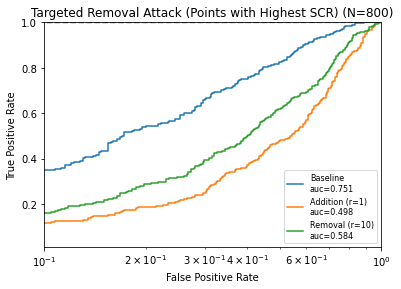

In [8]:
# HIGHEST SCR

exp_root = "exp/removal/targeted/class/extreme"
orig_target_idxs = np.load(join(os_root, "removal/targeted/class/extreme/high/target_idxs.npy"))
control_scores = np.take(control_main_scores, orig_target_idxs, axis=1)
control_keeps = np.take(control_main_keeps, orig_target_idxs, axis=1)

# Targeted (Adding Points)
add_scores = np.take(add_main_scores, orig_target_idxs, axis=1)
add_keeps = np.take(add_main_keeps, orig_target_idxs, axis=1)

# Removal Poisoning
pois = np.load(join(os_root, "removal/targeted/class/extreme/high/poison.npy"))
target_idxs = map_idx(orig_target_idxs, pois)

targ_main_scores, targ_main_keeps = load_data(join(exp_root, 'high'))
targ_scores = np.take(targ_main_scores, target_idxs, axis=1)
targ_keeps = np.take(targ_main_keeps, target_idxs, axis=1)

scores = [control_scores, add_scores, targ_scores]
keeps = [control_keeps, add_keeps, targ_keeps]

exp_names = ["Baseline", "Addition (r=1)", "Removal (r=10)"]
plot_cv([ [keeps[i], scores[i]] for i in range(len(scores) ) ], \
        exp_names, "Targeted Removal Attack (Points with Highest SCR)", xlim=(1e-1, 1))

Attack Baseline
   AUC 0.6749, Accuracy 0.6325, TPR@0.1%FPR of 0.0275
Attack Addition (r=1)
   AUC 0.9458, Accuracy 0.8587, TPR@0.1%FPR of 0.4700
Attack Removal (r=10)
   AUC 0.8685, Accuracy 0.7538, TPR@0.1%FPR of 0.4225


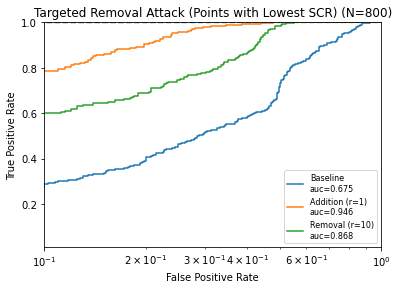

In [9]:
# LOWEST SCR

exp_root = "exp/removal/targeted/class/extreme"
orig_target_idxs = np.load(join(os_root, "removal/targeted/class/extreme/low/target_idxs.npy"))
control_scores = np.take(control_main_scores, orig_target_idxs, axis=1)
control_keeps = np.take(control_main_keeps, orig_target_idxs, axis=1)

# Targeted (Adding Points)
add_scores = np.take(add_main_scores, orig_target_idxs, axis=1)
add_keeps = np.take(add_main_keeps, orig_target_idxs, axis=1)

# Removal Poisoning
pois = np.load(join(os_root, "removal/targeted/class/extreme/low/poison.npy"))
target_idxs = map_idx(orig_target_idxs, pois)

targ_main_scores, targ_main_keeps = load_data(join(exp_root, 'low'))
targ_scores = np.take(targ_main_scores, target_idxs, axis=1)
targ_keeps = np.take(targ_main_keeps, target_idxs, axis=1)

scores = [control_scores, add_scores, targ_scores]
keeps = [control_keeps, add_keeps, targ_keeps]

exp_names = ["Baseline", "Addition (r=1)", "Removal (r=10)"]
plot_cv([ [keeps[i], scores[i]] for i in range(len(scores) ) ], \
        exp_names, "Targeted Removal Attack (Points with Lowest SCR)", xlim=(1e-1, 1))

## Untargeted

Attack Baseline
   AUC 0.6902, Accuracy 0.6167, TPR@0.1%FPR of 0.0535
Attack Removal
   AUC 0.7014, Accuracy 0.6249, TPR@0.1%FPR of 0.0545


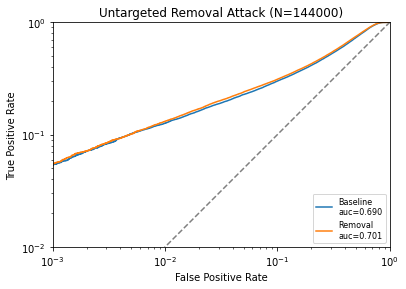

In [39]:
orig_target_idxs = np.load(join(os_root, "removal/untargeted/class_targets.npy"))

# IMPORTANT: target_idxs in control/baseline must not be mapped since there is no removal
control_scores = np.take(control_main_scores, orig_target_idxs, axis=1)
control_keeps = np.take(control_main_keeps, orig_target_idxs, axis=1)

pois = np.load(join(os_root, "removal/targeted/poison.npy"))
target_idxs = map_idx(orig_target_idxs, pois)

untarg_main_scores, untarg_main_keeps = load_data('exp/removal/untargeted/class')
untarg_scores = np.take(untarg_main_scores, target_idxs, axis=1)
untarg_keeps = np.take(untarg_main_keeps, target_idxs, axis=1)

scores = [control_scores, untarg_scores]
keeps = [control_keeps, untarg_keeps]

exp_names = ["Baseline", "Removal"]
plot_cv([ [keeps[i], scores[i]] for i in range(len(scores) ) ], \
        exp_names, "Untargeted Removal Attack")

Attack Baseline
   AUC 0.7077, Accuracy 0.6305, TPR@0.1%FPR of 0.0501
Attack Removal
   AUC 0.7489, Accuracy 0.6623, TPR@0.1%FPR of 0.0470


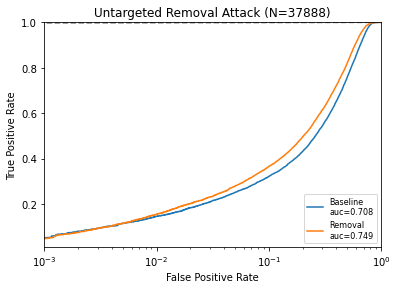

In [11]:
orig_target_idxs = np.load(join(os_root, "removal/untargeted/border/class_targets.npy"))
poison = np.load(join(os_root, "removal/untargeted/border/poison.npy"))

# IMPORTANT: target_idxs in control/baseline must not be mapped since there is no removal
control_scores = np.take(control_main_scores, orig_target_idxs, axis=1)
control_keeps = np.take(control_main_keeps, orig_target_idxs, axis=1)

target_idxs = map_idx(orig_target_idxs, poison)

untarg_main_scores, untarg_main_keeps = load_data('exp/removal/untargeted/border')
untarg_scores = np.take(untarg_main_scores, target_idxs, axis=1)
untarg_keeps = np.take(untarg_main_keeps, target_idxs, axis=1)

scores = [control_scores, untarg_scores]
keeps = [control_keeps, untarg_keeps]

exp_names = ["Baseline", "Removal"]
plot_cv([ [keeps[i], scores[i]] for i in range(len(scores) ) ], \
        exp_names, "Untargeted Removal Attack")

In [37]:
'''import shutil
taf = "exp/removal/targeted"
fat = "exp/removal/untargeted/class"

for i in range(32):
    p = "experiment-%i_32" %i
    shutil.rmtree(join(taf, p, "logits"))
    shutil.rmtree(join(taf, p, "scores"))

    shutil.rmtree(join(fat, p, "logits"))
    shutil.rmtree(join(fat, p, "scores"))'''